# Exercise: Visas over time

#### Summary

Find out how visas issued by the US have changed over time.

#### Data Source(s)

Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+, https://travel.state.gov/content/visas/en/law-and-policy/statistics/non-immigrant-visas.html

#### Files

- FYs97-16_NIVDetailTable.xls, "Nonimmigrant Visa Issuances by Visa Class and by Nationality, 1999+"

#### Skills

- Excel files with multiple sheets
- Combining multiple dataframes
- Filling in null values (filling down)
- Dropping and filtering rows
- Renaming columns
- Looping to clean a sheet
- Customizing matplotlib graphs

# Read in FYs97-16_NIVDetailTable.xls, but only the 1999 data

In [16]:
import pandas as pd

In [17]:
%matplotlib inline

In [18]:
df = pd.read_excel("FYs97-16_NIVDetailTable.xls")

## Look at the first couple rows to confirm it's the 1999 data

Don't worry that it's missing a lot of data yet.

In [19]:
df.head()

,Fiscal Year 1997,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,62.0,23.0,5.0,1661.0,507.0,3430.0,0.0,0.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.0,492.0,6878.0
2,Angola,54.0,169.0,3.0,10.0,1421.0,271.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2397.0,4.0,2401.0
3,Benin,10.0,43.0,4.0,104.0,375.0,249.0,0.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1105.0,10.0,1115.0
4,Botswana,10.0,79.0,1.0,2.0,366.0,54.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,850.0


## Confirm that you have 90 columns and 217 rows

In [20]:
df.shape

(217, 90)

## List all of the columns and their datatype

You'll need to change a pandas display option to make sure you can see all of them. **Make sure there is not a `...` in the middle**.

In [21]:
pd.set_option('display.max_rows', 1000)

In [22]:
df.dtypes

Fiscal Year 1997     object
A-1                 float64
A-2                 float64
A-3                 float64
B-1                 float64
B-1,2               float64
B-2                 float64
B-1,2/BCC           float64
B-1,2/BCV           float64
C-1                 float64
C-1/D               float64
C-2                 float64
C-3                 float64
D                   float64
D-CREW              float64
E-1                 float64
E-2                 float64
E-3                 float64
E-3D                float64
E-3R                float64
F-1                 float64
F-2                 float64
F-3                 float64
G-1                 float64
G-2                 float64
G-3                 float64
G-4                 float64
G-5                 float64
H-1A                float64
H-1B                float64
H-1B1               float64
H-1C                float64
H-2A                float64
H-2B                float64
H-2R                float64
H-3                 

## Rename the "Fiscal Year 1999" row to be "Country"

In [23]:
df = df.rename(columns={'Fiscal Year 1997': 'Country'})

## Look at the first 2 rows to make sure you renamed it correctly

In [24]:
df.head(2)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,62.0,23.0,5.0,1661.0,507.0,3430.0,0.0,0.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.0,492.0,6878.0


# Finding the dirty data

Usually we clean up columns with bad data, but this time **it's the rows that are bad**.

## Look at the first five rows. How can you identify the "bad" row?

There is one near the top and a few near the bottom.

In [25]:
df.head(30)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,62.0,23.0,5.0,1661.0,507.0,3430.0,0.0,0.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.0,492.0,6878.0
2,Angola,54.0,169.0,3.0,10.0,1421.0,271.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2397.0,4.0,2401.0
3,Benin,10.0,43.0,4.0,104.0,375.0,249.0,0.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1105.0,10.0,1115.0
4,Botswana,10.0,79.0,1.0,2.0,366.0,54.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,850.0
5,Burkina Faso,19.0,7.0,1.0,12.0,487.0,309.0,1.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1192.0,4.0,1196.0
6,Burundi,5.0,2.0,0.0,57.0,97.0,60.0,3.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,387.0,74.0,461.0
7,Cameroon,44.0,52.0,11.0,242.0,768.0,1128.0,0.0,0.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960.0,10.0,2970.0
8,Cape Verde,3.0,23.0,2.0,17.0,3273.0,763.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4261.0,1.0,4262.0
9,Central African Republic,7.0,5.0,0.0,7.0,69.0,33.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,2.0,210.0


## Find all of the "bad" rows based on what you decided was unique about the "bad" row

You should get **14 rows and 90 columns**.

In [26]:
df[df['Grand Total'].isnull()].shape

(14, 90)

## Is there a column for continent? How do you know what continent a country is in?

It's probably easiest to see this in Excel. Don't edit it in Excel, though!

In [12]:
# No, there is no column for continent. The continent is described as headers in a row above the countries.

## Cleaning up the data

We have several types of rows that we don't like:

- Headers for continents ("Africa," "Europe," etc)
- Totals for continents ("Totals for Africa," "Totals for Europe," etc.)
- The empty lines between continent sections

But we *do*! We're going to do a **three step process**:

1. Create a new "continent" column for each of the header rows
2. Copy that value down into all of the columns below it
3. Delete the header/total/space rows

### STEP 1: For each continent header row, add a new column called `continent` with the value of the continent

> If you get the warning `A value is trying to be set on a copy of a slice from a DataFrame`, let's talk about it, because it means your code didn't work!

In [27]:
df.loc[df.Country == 'Africa', 'Continent'] = 'Africa'
df.loc[df.Country == 'Europe', 'Continent'] = 'Europe'
df.loc[df.Country == 'North America', 'Continent'] = 'North America'
df.loc[df.Country == 'Oceania', 'Continent'] = 'Oceania'
df.loc[df.Country == 'South America', 'Continent'] = 'South America'
df.loc[df.Country == 'Asia', 'Continent'] = 'Asia'

## STEP 1 CONFIRMATION

Take a look at our data, make sure it looks right!

In [28]:
df.head()

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa
1,Algeria,62.0,23.0,5.0,1661.0,507.0,3430.0,0.0,0.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6386.0,492.0,6878.0,NaN
2,Angola,54.0,169.0,3.0,10.0,1421.0,271.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2397.0,4.0,2401.0,NaN
3,Benin,10.0,43.0,4.0,104.0,375.0,249.0,0.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1105.0,10.0,1115.0,NaN
4,Botswana,10.0,79.0,1.0,2.0,366.0,54.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,850.0,NaN


## STEP 2: Filling down

Use pandas to take that continent value and "copy it down" through the null values. So it might start off looking like this...

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|NaN|
|Angola|2843.0|NaN|
|Asia|NaN|Asia|
|Afghanistan|2217.0|NaN|
|Bahrain|2502.0|NaN|

and then look like this:

|Country|Grand Total|Continent|
|---|---|---|
|Africa|NaN|Africa|
|Algeria|6454.0|**Africa**|
|Angola|2843.0|**Africa**|
|Asia|NaN|Asia|
|Afghanistan|2217.0|**Asia**|
|Bahrain|2502.0|**Asia**|

In [29]:
df['Continent'] = df['Continent'].fillna(method='ffill')

## STEP 2 CONFIRMATION

Check how many rows of each continent exist in the dataset. **Europe and Africa should both have 56.**

In [32]:
df['Continent'].value_counts()

Europe           56
Africa           56
Asia             42
North America    25
South America    21
Oceania          17
Name: Continent, dtype: int64

## STEP 3: Deleting the bad rows

### Delete the rows where "Grand Total" is missing

- Tip: There are multiple ways to do this! I can tell you them!

In [34]:
df = df[df['Grand Total'].notnull()]

### Look at the first 55 rows to be sure it worked

In [36]:
df.head(55)

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total,Continent
1,Algeria,62.0,23.0,5.0,1661.0,507.0,3430.0,0.0,0.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6386.0,492.0,6878.0,Africa
2,Angola,54.0,169.0,3.0,10.0,1421.0,271.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2397.0,4.0,2401.0,Africa
3,Benin,10.0,43.0,4.0,104.0,375.0,249.0,0.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1105.0,10.0,1115.0,Africa
4,Botswana,10.0,79.0,1.0,2.0,366.0,54.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,850.0,Africa
5,Burkina Faso,19.0,7.0,1.0,12.0,487.0,309.0,1.0,0.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1192.0,4.0,1196.0,Africa
6,Burundi,5.0,2.0,0.0,57.0,97.0,60.0,3.0,0.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,387.0,74.0,461.0,Africa
7,Cameroon,44.0,52.0,11.0,242.0,768.0,1128.0,0.0,0.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2960.0,10.0,2970.0,Africa
8,Cape Verde,3.0,23.0,2.0,17.0,3273.0,763.0,0.0,0.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4261.0,1.0,4262.0,Africa
9,Central African Republic,7.0,5.0,0.0,7.0,69.0,33.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,208.0,2.0,210.0,Africa
10,Chad,24.0,53.0,0.0,17.0,110.0,89.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,490.0,9.0,499.0,Africa


### Delete the rows where "Country" has "Totals"

Now that we have the "Continent" column we can calculate totals with a groupby.

- Tip: There are multiple ways to do this, but only one best way to do it! It probably isn't the same as the last question.

In [37]:
df = df[~df['Country'].str.contains('Totals')]

## Confirm your cleanup worked

Check to make sure you have 195 rows and 90 columns

In [38]:
df.shape

(195, 91)

# Making a few graphs

Create a bar graph of the top 10 countries that visas are from

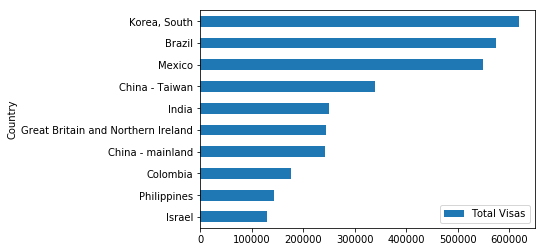

In [39]:
df.sort_values(by='Total Visas', ascending=False).head(10).plot(kind='barh', x='Country', y='Total Visas').invert_yaxis()

## Clean up that graph!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add commas for the number axis

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
```

In [40]:
import matplotlib.ticker as ticker

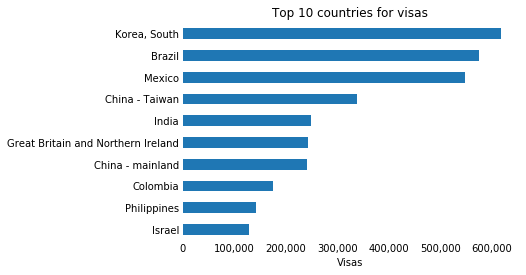

In [41]:
ax = df.sort_values(by='Total Visas', ascending=False).head(10).plot(kind='barh', x='Country', y='Total Visas', legend=False)
ax.invert_yaxis()
ax.set_title('Top 10 countries for visas')
ax.set_xlabel('Visas')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(length=0)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

## Create a bar graph of the total number of F-1 visas from each continent

And make it look nice!

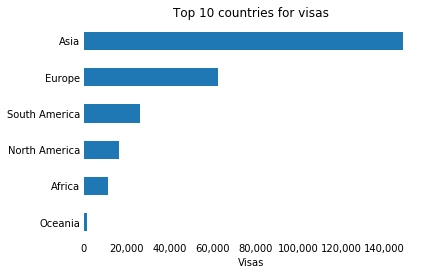

In [43]:
ax = df.groupby('Continent')['F-1'].sum().sort_values().plot(kind='barh', x='Country', y='Total Visas', legend=False)
ax.set_title('Top 10 countries for visas')
ax.set_xlabel('Visas')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(length=0)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Read in the data from 2000-2016

They should each be in a separate dataframe.

- Tip: Maybe I have quicker ways to do this?

In [44]:
sheetnames = [
    'FY97', 'FY98', 'FY99', 'FY00', 'FY01', 'FY02', 'FY03', 'FY04', 'FY05', 'FY06',
    'FY07', 'FY08', 'FY09', 'FY10', 'FY11', 'FY12', 'FY13', 'FY14', 'FY15', 'FY16'
]

In [45]:
sheets = [pd.read_excel('FYs97-16_NIVDetailTable.xls', sheetname=sheet) for sheet in sheetnames]

# Clean them up, just like you did with the 1999 data

## STEP 1: For each of the dataframes, rename the "Fiscal Year XXXX" column as "Country"

- Tip: What does the code down below give you?

```python
df.columns.str.replace('Fiscal Year.*', 'Country')
```

- Tip: Is there another way to rename columns besides `.rename`?
- Tip: Use a for loop

In [46]:
for dataframe in sheets:
    dataframe.columns = dataframe.columns.str.replace('Fiscal Year.*', 'Country')

## STEP 2: Add the 'Continent' Column and get rid of the bad rows

The code below will drop any column where 'Country' has 'Totals for' in it. The trick we used above won't work because we're in a list.

```python
df.drop(df.index[df['Country'].str.contains("Totals for", na=False)])
```

In [47]:
sheets[0].head()

,Country,A-1,A-2,A-3,B-1,"B-1,2",B-2,"B-1,2/BCC","B-1,2/BCV",C-1,...,U-1,U-2,U-3,U-4,V-1,V-2,V-3,Total Visas,BCC,Grand Total
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,62.0,23.0,5.0,1661.0,507.0,3430.0,0.0,0.0,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6386.0,492.0,6878.0
2,Angola,54.0,169.0,3.0,10.0,1421.0,271.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2397.0,4.0,2401.0
3,Benin,10.0,43.0,4.0,104.0,375.0,249.0,0.0,0.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1105.0,10.0,1115.0
4,Botswana,10.0,79.0,1.0,2.0,366.0,54.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,850.0,0.0,850.0


## STEP 3: Add the year to each dataframe

We can't combine them yet because you need to be able to separate them. Use the code below to get close.

```python
for sheet_df, fiscal_year in zip(sheets, sheetnames):
    sheet_df['year'] = fiscal_year
```

In [48]:
for sheet_df, fiscal_year in zip(sheets, sheetnames):
    sheet_df['year'] = fiscal_year

# Combining the dataframes into one big dataframe

Combine them, confirming the result has 4464 rows and 96 columns

- Tip: don't use .merge!

In [49]:
df_combined = pd.concat(sheets, ignore_index=True)

In [50]:
df_combined

,A-1,A-2,A-3,B-1,"B-1,2","B-1,2/BCC","B-1,2/BCV",B-2,BCC,C-1,...,Total Visas,U-1,U-2,U-3,U-4,U-5,V-1,V-2,V-3,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FY97
1,62.0,23.0,5.0,1661.0,507.0,0.0,0.0,3430.0,492.0,57.0,...,6386.00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,FY97
2,54.0,169.0,3.0,10.0,1421.0,1.0,0.0,271.0,4.0,10.0,...,2397.00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,FY97
3,10.0,43.0,4.0,104.0,375.0,0.0,0.0,249.0,10.0,37.0,...,1105.00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,FY97
4,10.0,79.0,1.0,2.0,366.0,0.0,0.0,54.0,0.0,3.0,...,850.00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,FY97
5,19.0,7.0,1.0,12.0,487.0,1.0,0.0,309.0,4.0,24.0,...,1192.00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,FY97
6,5.0,2.0,0.0,57.0,97.0,3.0,0.0,60.0,74.0,49.0,...,387.00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,FY97
7,44.0,52.0,11.0,242.0,768.0,0.0,0.0,1128.0,10.0,53.0,...,2960.00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,FY97
8,3.0,23.0,2.0,17.0,3273.0,0.0,0.0,763.0,1.0,16.0,...,4261.00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,FY97
9,7.0,5.0,0.0,7.0,69.0,0.0,0.0,33.0,2.0,5.0,...,208.00,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,FY97


## A little cleaning

Replace FY97 with 1997, FY98 with 1998, FY99 with FY1999, FY00 with 2000, etc.

- Tip: You could do this in a fancy way using extract or loops or who knows what but honestly .replace might be fastest!

In [51]:
df_combined['year'] = df_combined['year'].str.replace('FY9', '199')
df_combined['year'] = df_combined['year'].str.replace('FY', '20')
df_combined['year'].value_counts().sort_index()

1997    217
1998    217
1999    217
2000    219
2001    219
2002    219
2003    219
2004    219
2005    219
2006    220
2007    225
2008    228
2009    228
2010    228
2011    229
2012    229
2013    228
2014    228
2015    228
2016    228
Name: year, dtype: int64

# A little graphing

## Graph the number of visas granted to Colombia over time

Make it look nice!

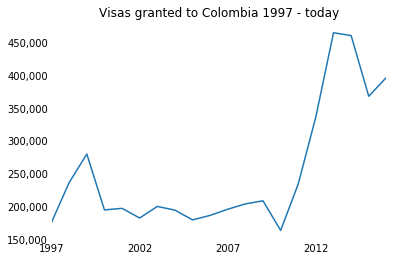

In [53]:
ax = df_combined[df_combined['Country'] == 'Colombia'].plot(x='year', y='Total Visas', legend=False)
ax.set_title('Visas granted to Colombia 1997 - today')
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(length=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

## How about Iraq?

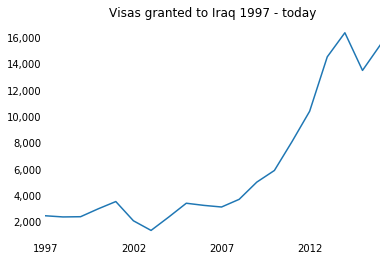

In [54]:
ax = df_combined[df_combined['Country'] == 'Iraq'].plot(x='year', y='Total Visas', legend=False)
ax.set_title('Visas granted to Iraq 1997 - today')
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(length=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

## Mexico?

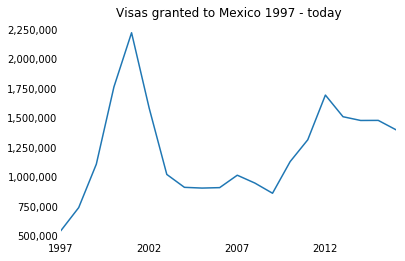

In [56]:
ax = df_combined[df_combined['Country'] == 'Mexico'].plot(x='year', y='Total Visas', legend=False)
ax.set_title('Visas granted to Mexico 1997 - today')
ax.set_xlabel('')
ax.set_ylabel('')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(length=0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))